In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [212]:
print(train.shape)
number_of_entries = train.shape[0]
print(test.shape)
#the test dataset has no label column

(42000, 785)
(28000, 784)


In [213]:
y_train = train['label']
X_train = train.drop('label', axis=1)

In [214]:
y_train

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


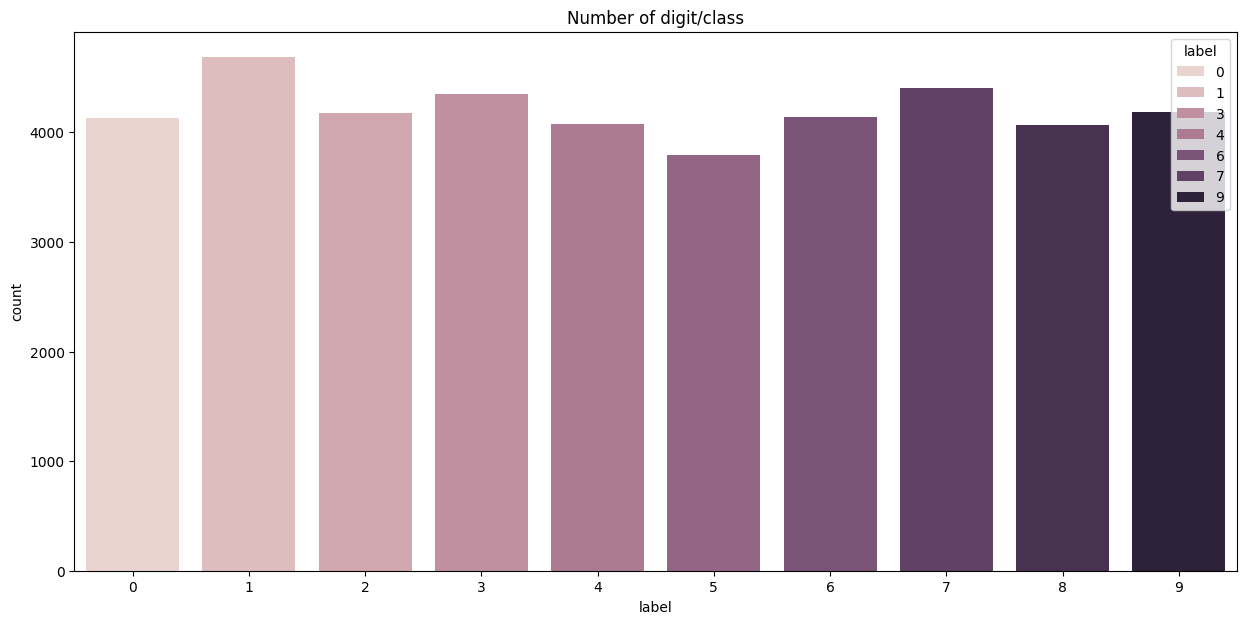

In [215]:
plt.figure(figsize=(15,7))
sns.countplot(train,x='label',hue='label')
plt.title("Number of digit/class")
plt.show()

In [216]:
y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [217]:
import random

def PlotExamplesFromDataset(how_many):
  for i in range(how_many):
    index = random.randint(0,number_of_entries)
    img = X_train.iloc[index].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title(train.iloc[index,0])
    plt.show()

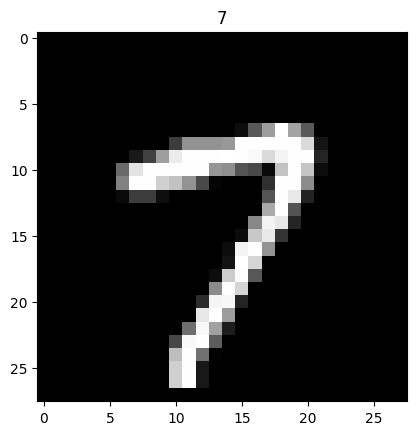

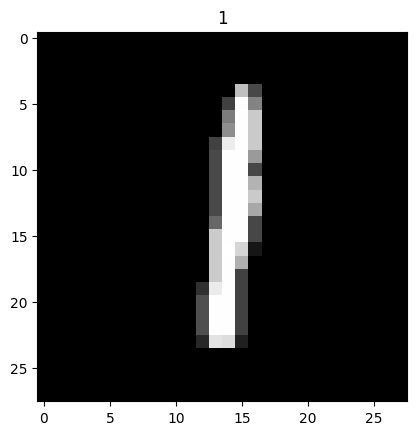

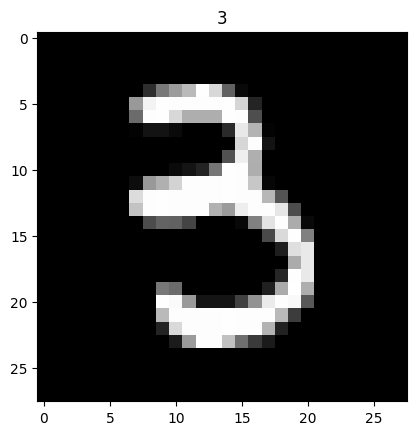

In [218]:
PlotExamplesFromDataset(3)

In [219]:
#normalization

X_train = X_train/255.0
test = test/255.0
test_to_print = test

In [220]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [221]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [223]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="Same", activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [224]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [225]:
model.compile(
    optimizer= optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [226]:
#data augmentation

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 5,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

In [227]:
datagen.fit(X_train)

In [228]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=512),
                              epochs=32,
                              validation_data=(X_val, y_val),
                              steps_per_epoch=X_train.shape[0]//batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/32
 74/151 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - accuracy: 0.3765 - loss: 1.7976

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.4576 - loss: 1.5839 - val_accuracy: 0.9124 - val_loss: 0.3552
Epoch 2/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - accuracy: 0.7899 - loss: 0.6421 - val_accuracy: 0.9545 - val_loss: 0.1697
Epoch 3/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.8697 - loss: 0.4079 - val_accuracy: 0.9662 - val_loss: 0.1245
Epoch 4/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9005 - loss: 0.3249 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 5/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.9110 - loss: 0.2858 - val_accuracy: 0.9743 - val_loss: 0.0920
Epoch 6/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9188 - loss: 0.2618 - val_accuracy: 0.9767 - val_loss: 0.0838
Epoch 7/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9289 - loss: 0.2320 - val_accuracy: 0.9771 - val_loss: 0.0809
Epoch 8/32
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9307 - loss: 0.2185 - val

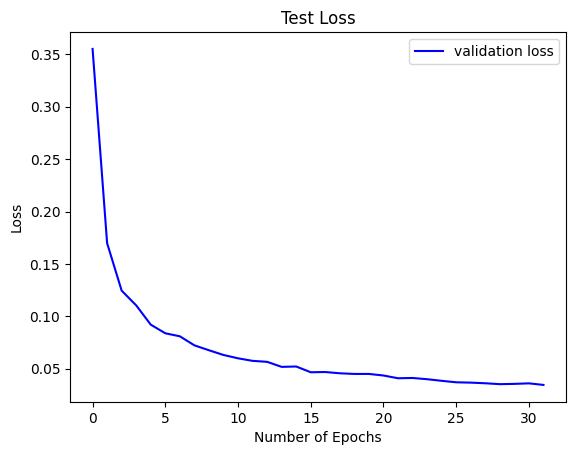

In [229]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


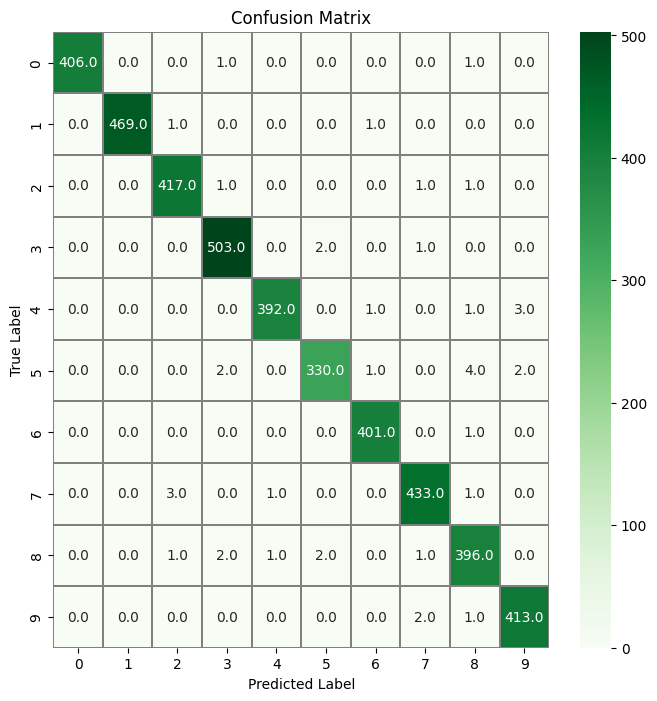

In [230]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [231]:
model.save('cnn_model.keras')

In [232]:
def Show_digit_ascii(input_img):
    array = np.array(input_img).reshape(28,28)
    chars = [' ', '░', '▒', '▓', '█']
    for row in array:
        print(''.join([chars[int(val * (len(chars)-1))] for val in row]))

In [233]:
def CompareTestPrediction(index):
  Show_digit_ascii(test_to_print.iloc[index])
  print(np.argmax(model.predict(test_to_print.iloc[index].values.reshape(1,28,28,1))))

In [239]:
CompareTestPrediction(12408)

                            
                            
                            
                            
                            
                            
           ▓█▒       ▒▓     
          ▒▓▓▓      ▓▓▓     
          ░▓▓▒     ▒▓▓░     
          ▒▓▓      ▒▓▓      
          ▓▓▓      ▓▓▒      
         ▒▓▓▒     ░▓▓░      
         ▓▓▓      ▓▓▓       
        ▒▓▓▓      ▓▓▒       
       ░▓▓▓▓▓▓▓▓▓▒▓▓░       
       ▓▓▓▓▓▓▓▓▓▓▓▓▓        
       ▓▓▓▓▓▒▒▒▒▓▓▓▓░       
       ▓▓▒░     ▓▓▓▓░       
               ░▓▓▓         
               ░▓▓░         
               ▓▓▓          
              ▒▓▓▒          
              ▓▓▓           
             ▒▓▓▒           
             ▓▓▒            
             ▓▓▒            
                            
                            
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4
